***
***
# __Project 2__ : Logistic Regression



### __Team Members__
- __Masixole Boya__ - 1869204
- __Lebo__ - 000000
- __Thapelo__ - 000000
- __Lusanda__ - 000000

***
***

# __0. Imports__

### __0.1 Libraries and Dependencies__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress


### __0.2 Data Import__

In [2]:
df = pd.read_csv(r"C:\Users\leboh\OneDrive\Desktop\Masters (Data Science)\My\Statistical Foundations of Data Science\Project 2\Data_Scientists_data")
df

,ID,Pay,Perf,EstHap,Stay
0,1,33000,6,7,1
1,2,25000,6,7,1
2,3,16000,5,6,1
3,4,17000,7,7,1
4,5,28000,7,7,1
...,...,...,...,...,...
495,496,18000,9,6,1
496,497,21000,7,6,1
497,498,18000,7,9,1
498,499,35000,6,7,1


# __1. Data Exploration__

In [3]:
df.sample(5)

,ID,Pay,Perf,EstHap,Stay
473,474,23000,6,5,1
428,429,20000,6,5,1
484,485,16000,4,6,1
115,116,35000,5,7,1
280,281,20000,5,8,1


### __1.1 Data Summary__

The `ID` column in the dataset does not contribute meaningful information, and it therefore removed, as it is a unique identifier for each row (employee) in the dataset.
It does not carry any inherent information about the characteristics or behaviors of the employees. The model will be concerned with features that describe attributes or outcomes (i.e salary, performance, happiness).
Instead, including this column in regression can be misleading.
Models may mistakenly assign significance to the ID values, which are arbitrary and not related to the target variable (e.g., whether an employee stayed).

In [4]:
df.drop(columns='ID', inplace=True)
df = pd.DataFrame(df)

#### __1.1.1 Unique Values__

Exploring unique values for each column is important in data exploration as it provides a comprehensive understanding of the data's structure and diversity. This step helps identify categorical variables, detect anomalies or outliers, and assess the range of values in each feature. This helps us to think of further handling of the data. We are able to then take informed decisions about handling missing data, encoding categorical variables, and addressing any irregularities.

In [5]:
for i in df.columns:
    print(f"Unique values for column '{i}': {df[i].unique()}\n")


Unique values for column 'Pay': [ 33000  25000  16000  17000  28000  37000  18000  26000  31000  27000
  38000  24000  22000  23000  19000  13000  20000  44000  29000  21000
  32000  34000  15000  36000  35000  11000  30000  10000 295000  41000
  39000  14000  12000]

Unique values for column 'Perf': [ 6  5  7  3 10  9  8  4  2]

Unique values for column 'EstHap': [ 7  6  5  8  9  4 11]

Unique values for column 'Stay': [1 0 2]



#### __1.1.2 Detailed Data Overview__

Using the `df.info()` function in pandas is crucial in data exploration because it provides a comprehensive overview of the DataFrame's structure and content.<br>
The output starts by confirming that `df` is indeed a DataFrame object, followed by indicating that there are `500 entries` indexed from 0 to 499, which immediately tells us the size of the dataset. This is particularly useful for understanding the scope of the data we are dealing with. The summary then lists all columns `(Pay, Perf, EstHap, and Stay)`, alongside the count of `non-null` values for each column. In this case, every column has `500 non-null entries`, indicating that there are `no missing values`, which is essential for ensuring data integrity and deciding on necessary preprocessing steps. The `data types (dtype)` of each column are displayed next, revealing that all columns are of `type int64`, confirming that all the columns are numerical and can be used directly in calculations and models without further type conversion. Additionally, the memory usage is shown to be 15.8 KB, giving an idea of the dataset's footprint in memory, and this information is valuable when working with large datasets or limited memory resources. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pay     500 non-null    int64
 1   Perf    500 non-null    int64
 2   EstHap  500 non-null    int64
 3   Stay    500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB


#### __1.1.3 Summary Statistics__

The output of the `.describe()` functiom is essential in data exploration because it provides a detailed statistical summary to help draw the image of the data's distribution, central tendencies, and variability. This summary includes key metrics such as the `count`, `mean`, `standard deviation`, `minimum`, `maximum`, and various percentiles `(25th, 50th, and 75th)` for the columns `Pay, Perf, and EstHap`. For instance, knowing that the average salary (Pay) is $23,602 with a high standard deviation of $13,519.81 indicates significant variation in salaries among employees. The performance ratings (Perf) and estimated happiness (EstHap) show means of approximately 6.05 and 6.44, respectively, with lower standard deviations, suggesting more consistency. The minimum and maximum values highlight the range within each column, such as the salary range from $10,000 to $295,000, performance ratings from 2 to 10, and happiness ratings from 4 to 11. The percentiles provide additional insights; for example, 25% of employees earn $19,000 or less, while 75% earn up to $27,000. This summary is key for identifying data trends, and detecting outliers.







In [7]:
df[['Pay', 'Perf', 'EstHap']].describe()

,Pay,Perf,EstHap
count,500.000000,500.000000,500.000000
mean,23602.000000,6.052000,6.440000
std,13519.806446,1.446887,0.984041
min,10000.000000,2.000000,4.000000
25%,19000.000000,5.000000,6.000000
50%,22000.000000,6.000000,6.000000
75%,27000.000000,7.000000,7.000000
max,295000.000000,10.000000,11.000000


In [8]:
print("Stay distribution:")
df['Stay'].value_counts()

Stay distribution:


1    457
0     42
2      1
Name: Stay, dtype: int64

# __1.2 Data Visualisation__

### __1.2.1 Distributions__

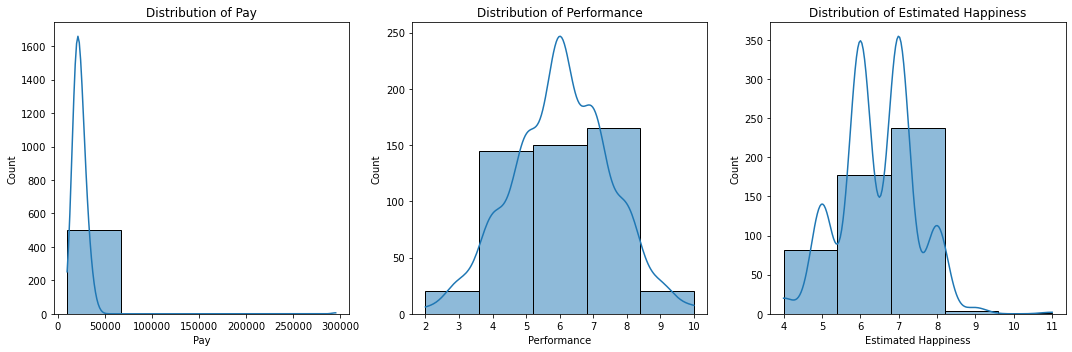

In [9]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for Pay
sns.histplot(df['Pay'], bins=5, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Pay')
axs[0].set_xlabel('Pay')
axs[0].set_ylabel('Count')

# Histogram for Perf
sns.histplot(df['Perf'], bins=5, kde=True, ax=axs[1])
axs[1].set_title('Distribution of Performance')
axs[1].set_xlabel('Performance')
axs[1].set_ylabel('Count')

# Histogram for EstHap
sns.histplot(df['EstHap'], bins=5, kde=True, ax=axs[2])
axs[2].set_title('Distribution of Estimated Happiness')
axs[2].set_xlabel('Estimated Happiness')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


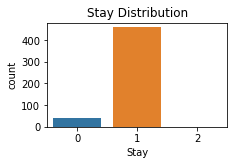

In [10]:
plt.subplot(2, 2, 4)
sns.countplot(x='Stay', data=df)
plt.title('Stay Distribution')

plt.tight_layout()
plt.show()


# Pair-Plot

Above is a diagram that represents the combination of variables using scatter plots and the diagonal plos show the distribution of each individual variable. This is called a pair-plot.

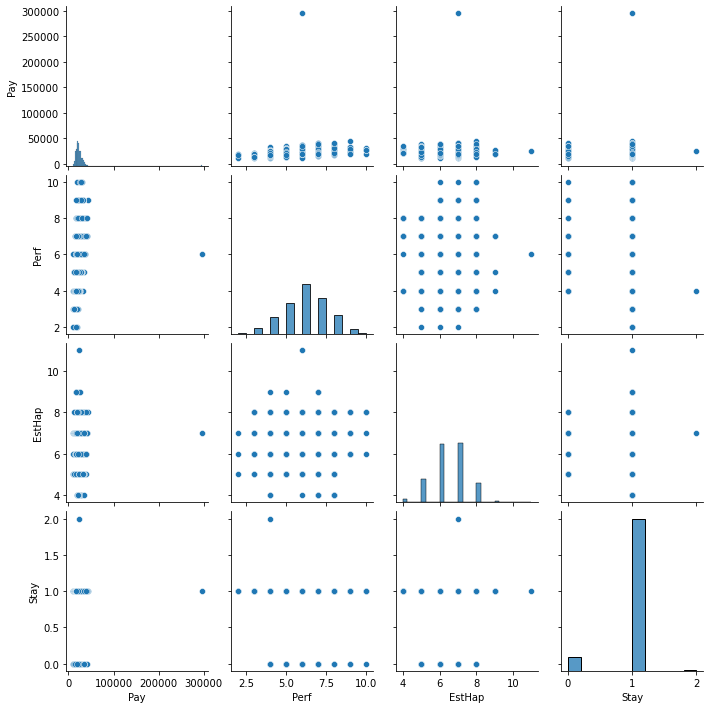

In [14]:
sns.pairplot(df)

### __1.2.2 Correlation Matrix__

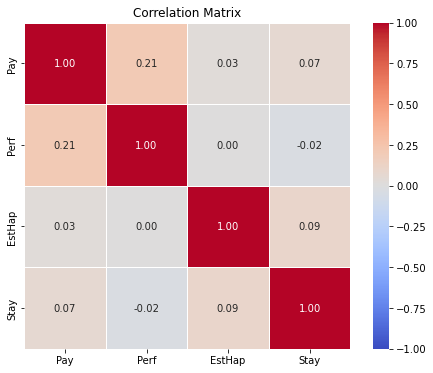

In [12]:
corr_matrix = df[['Pay', 'Perf', 'EstHap', 'Stay']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### __1.2.3 Correlation PLots__

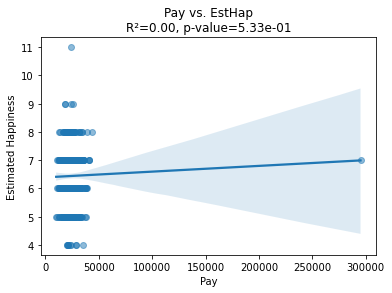

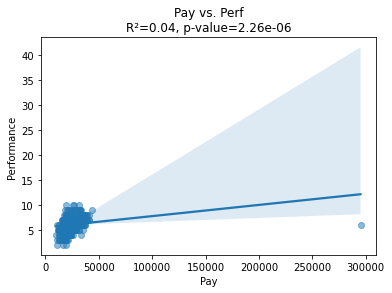

In [13]:

# Pay vs. EstHap
sns.regplot(x='Pay', y='EstHap', data=df, scatter_kws={'alpha':0.5})
slope, intercept, r_value, p_value, std_err = linregress(df['Pay'], df['EstHap'])
plt.title(f'Pay vs. EstHap\nR²={r_value**2:.2f}, p-value={p_value:.2e}')
plt.xlabel('Pay')
plt.ylabel('Estimated Happiness')

plt.show()

# Pay vs. Perf
sns.regplot(x='Pay', y='Perf', data=df, scatter_kws={'alpha':0.5})
slope, intercept, r_value, p_value, std_err = linregress(df['Pay'], df['Perf'])
plt.title(f'Pay vs. Perf\nR²={r_value**2:.2f}, p-value={p_value:.2e}')
plt.xlabel('Pay')
plt.ylabel('Performance')

plt.show()


The Stay column in your dataset is a binary variable (0 or 1), which typically represents whether an employee stayed (Stay = 1) or left (Stay = 0) the company. Scatter plots are typically used to visualize the relationship between two continuous variables.

Since Stay is a categorical variable (even though it's represented numerically as 0 and 1), it doesn't make sense to create a scatter plot with Stay as one of the variables because scatter plots are used to show the relationship or correlation between two continuous variables.